#cài đặt pyreadstat để đọc sav files

In [1]:
!pip install pyreadstat

#Nạp dữ liệu

In [18]:
#import các thư viện
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier




df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/Do_an_Nhom/Ice_cream_R.csv")
#đọc file sav
sav = pd.read_spss("/content/drive/MyDrive/Colab Notebooks/Data Mining/Do_an_Nhom/Ice_cream_SPSS.sav")
df

,id,female,ice_cream,video,puzzle
0,70,0,2,47,57
1,121,1,1,63,61
2,86,0,3,58,31
3,141,0,3,53,56
4,172,0,1,53,61
...,...,...,...,...,...
195,31,1,1,42,56
196,145,1,1,36,46
197,187,1,1,55,52
198,118,1,1,58,61


,id,female,ice_cream,video,puzzle
0,70,0,2,47,57
1,121,1,1,63,61
2,86,0,3,58,31
3,141,0,3,53,56
4,172,0,1,53,61
...,...,...,...,...,...
195,31,1,1,42,56
196,145,1,1,36,46
197,187,1,1,55,52
198,118,1,1,58,61


In [19]:
#file sav
sav

,id,female,ice_cream,video,puzzle
0,70.0,male,chocolate,47.0,57.0
1,121.0,female,vanilla,63.0,61.0
2,86.0,male,strawberry,58.0,31.0
3,141.0,male,strawberry,53.0,56.0
4,172.0,male,vanilla,53.0,61.0
...,...,...,...,...,...
195,31.0,female,vanilla,42.0,56.0
196,145.0,female,vanilla,36.0,46.0
197,187.0,female,vanilla,55.0,52.0
198,118.0,female,vanilla,58.0,61.0


,id,female,ice_cream,video,puzzle
0,70.0,male,chocolate,47.0,57.0
1,121.0,female,vanilla,63.0,61.0
2,86.0,male,strawberry,58.0,31.0
3,141.0,male,strawberry,53.0,56.0
4,172.0,male,vanilla,53.0,61.0
...,...,...,...,...,...
195,31.0,female,vanilla,42.0,56.0
196,145.0,female,vanilla,36.0,46.0
197,187.0,female,vanilla,55.0,52.0
198,118.0,female,vanilla,58.0,61.0


#**Tìm hiểu dữ liệu**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         200 non-null    int64
 1   female     200 non-null    int64
 2   ice_cream  200 non-null    int64
 3   video      200 non-null    int64
 4   puzzle     200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         200 non-null    int64
 1   female     200 non-null    int64
 2   ice_cream  200 non-null    int64
 3   video      200 non-null    int64
 4   puzzle     200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


#Tỷ lệ  của các nhãn

In [21]:
label = df['ice_cream'].value_counts()
label
#95: vani
#58: strawberry
#47: choco

1    95
3    58
2    47
Name: ice_cream, dtype: int64

1    95
3    58
2    47
Name: ice_cream, dtype: int64

#Vani là nhóm kem phổ biến nhất

In [22]:
(df['ice_cream'].value_counts()/df['ice_cream'].count())* 100

1    47.5
3    29.0
2    23.5
Name: ice_cream, dtype: float64

1    47.5
3    29.0
2    23.5
Name: ice_cream, dtype: float64

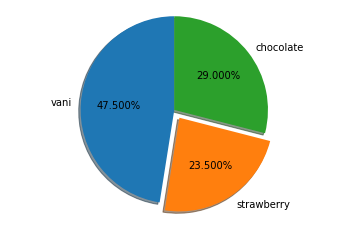

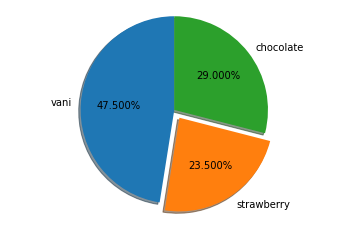

In [23]:
#biểu đồ tròn
name_labels = 'vani', 'strawberry', 'chocolate'
sizes = [label[1],label[2],label[3]]
explode = (0, 0.1, 0) 

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=name_labels, autopct='%1.3f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

#Tỷ lệ nam và nữ 

In [24]:
gender = df['female'].value_counts()
gender
#109 nữ, 91 nam

1    109
0     91
Name: female, dtype: int64

1    109
0     91
Name: female, dtype: int64

In [25]:
(df['female'].value_counts()/df['female'].count())*100

1    54.5
0    45.5
Name: female, dtype: float64

1    54.5
0    45.5
Name: female, dtype: float64

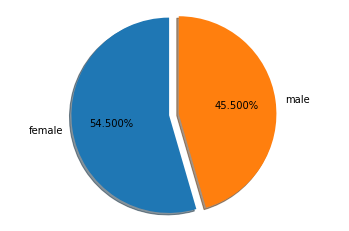

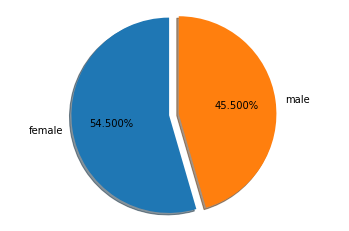

In [26]:
#biểu đồ tròn
name_labels = 'female', 'male'
sizes = [gender[1],gender[0]]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=name_labels, autopct='%1.3f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

#Describe()

In [27]:
df.describe()

,id,female,ice_cream,video,puzzle
count,200.000000,200.00000,200.000000,200.000000,200.000000
mean,100.500000,0.54500,1.815000,51.850000,52.405000
std,57.879185,0.49922,0.856999,9.900891,10.735793
min,1.000000,0.00000,1.000000,26.000000,26.000000
25%,50.750000,0.00000,1.000000,44.000000,46.000000
50%,100.500000,1.00000,2.000000,53.000000,52.000000
75%,150.250000,1.00000,3.000000,58.000000,61.000000
max,200.000000,1.00000,3.000000,74.000000,71.000000


,id,female,ice_cream,video,puzzle
count,200.000000,200.00000,200.000000,200.000000,200.000000
mean,100.500000,0.54500,1.815000,51.850000,52.405000
std,57.879185,0.49922,0.856999,9.900891,10.735793
min,1.000000,0.00000,1.000000,26.000000,26.000000
25%,50.750000,0.00000,1.000000,44.000000,46.000000
50%,100.500000,1.00000,2.000000,53.000000,52.000000
75%,150.250000,1.00000,3.000000,58.000000,61.000000
max,200.000000,1.00000,3.000000,74.000000,71.000000


#count: tổng số phần tử
#mean: giá trị trung bình của mỗi thuộc tính
#std: độ lệch chuyển của các giá trị
#min: giá trị nhỏ nhất của thuộc tính đó
#50%: cho biết trung vị của mỗi thuộc tính
#max: giá trị lớn nhất của thuộc tính

#**Phân tích mối quan hệ giữa các biến**

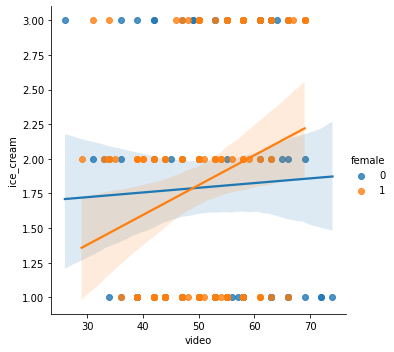

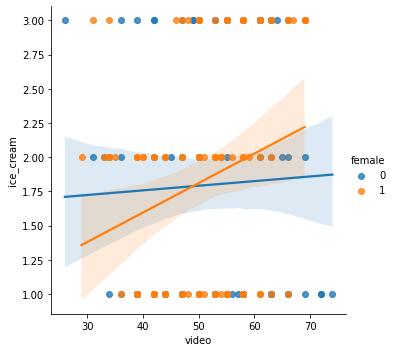

In [28]:
sns.lmplot(x='video', 
           y='ice_cream',
           hue = 'female', 
           data = df)

#female và video

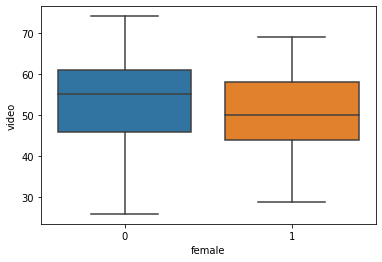

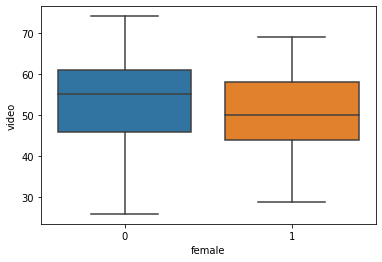

In [29]:
sns.boxplot(x='female',
            y='video',
            data = df)

#female và puzzle

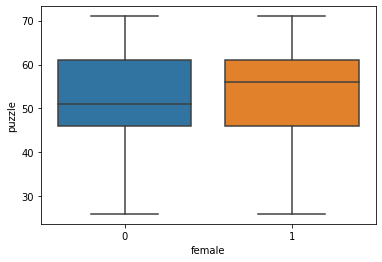

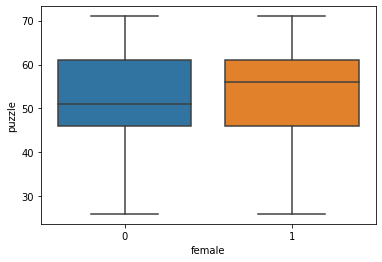

In [30]:
sns.boxplot(x='female',
            y='puzzle',
            data = df)

#Skewed data

In [31]:
df_nan= df.isna()
df_sum_nan = df_nan.sum()
df_sum_nan

id           0
female       0
ice_cream    0
video        0
puzzle       0
dtype: int64

id           0
female       0
ice_cream    0
video        0
puzzle       0
dtype: int64

#Xây dựng mô hình đánh giá qua 10 lần lặp

#cây quyết định và navie bayes

In [32]:
X = df.iloc[:,[1,3,4]]
y = df.ice_cream
# Sử dụng nghi thức kiểm tra hold-out
# Chia dữ liệu ngẫu nhiên thành 2 tập dữ liệu con:
# training set và test set theo tỷ lệ 70/30
from sklearn.model_selection import train_test_split
A=[]
B=[]
C=[]
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 100+i) 
  
  #DecisionTreeClassifier
  model1 = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=7,max_depth=7)
  model1.fit(X_train, y_train)
  #GaussianNB
  model2 = GaussianNB()
  model2.fit(X_train, y_train)
  # Xây dựng mô hình với k = 3
  model3 = KNeighborsClassifier(n_neighbors=3)
  model3.fit(X_train, y_train)
  #predict
  y_pred1 = model1.predict(X_test) 
  y_pred2 = model2.predict(X_test) 
  y_pred3 = model3.predict(X_test) 
  #print(y_test) 
  #print(y_pred)
  #accuracy
  print("Lần ",i+1)
  
  train_lb = y_train.value_counts()
  #tỷ lệ của các nhãn trong tập train qua mỗi lần lặp
  print("train_lb:\n",train_lb)
  print("Do chinh xac cua mo hinh DecisionTreeClassifier voi nghi thuc kiem tra hold-out: %.3f" % round(accuracy_score(y_test, y_pred1)*100,2))
  A.append(round(accuracy_score(y_test, y_pred1)*100,2))
  print("Do chinh xac cua mo hinh GaussianNB voi nghi thuc kiem tra hold-out:             %.3f" % round(accuracy_score(y_test, y_pred2)*100,2))
  B.append(round(accuracy_score(y_test, y_pred2)*100,2))
  print("Do chinh xac cua mo hinh KNN voi nghi thuc kiem tra hold-out:             %.3f" % round(accuracy_score(y_test, y_pred3)*100,2))
  C.append(round(accuracy_score(y_test, y_pred3)*100,2))

Lần  1
train_lb:
 1    63
3    40
2    37
Name: ice_cream, dtype: int64
Do chinh xac cua mo hinh DecisionTreeClassifier voi nghi thuc kiem tra hold-out: 55.000
Do chinh xac cua mo hinh GaussianNB voi nghi thuc kiem tra hold-out:             53.330
Do chinh xac cua mo hinh KNN voi nghi thuc kiem tra hold-out:             55.000
Lần  2
train_lb:
 1    66
3    40
2    34
Name: ice_cream, dtype: int64
Do chinh xac cua mo hinh DecisionTreeClassifier voi nghi thuc kiem tra hold-out: 50.000
Do chinh xac cua mo hinh GaussianNB voi nghi thuc kiem tra hold-out:             53.330
Do chinh xac cua mo hinh KNN voi nghi thuc kiem tra hold-out:             51.670
Lần  3
train_lb:
 1    66
3    45
2    29
Name: ice_cream, dtype: int64
Do chinh xac cua mo hinh DecisionTreeClassifier voi nghi thuc kiem tra hold-out: 45.000
Do chinh xac cua mo hinh GaussianNB voi nghi thuc kiem tra hold-out:             50.000
Do chinh xac cua mo hinh KNN voi nghi thuc kiem tra hold-out:             41.670
Lần  4
train_

#Trung bình của 10 lần lặp
#thấy không chênh lệch quá nhiều giữa 2 thuật toán cây quyết định và navie bayes

In [34]:
tb_tree=0
tb_nb=0
tb_knn=0

for i in range(10):
  tb_tree+=A[i]
  tb_nb+=B[i]
  tb_knn+=C[i]

print("Cay quyet dinh :", tb_tree/10)
print("Navie Bayes :", tb_nb/10)
print("Navie Bayes :", tb_knn/10)

Cay quyet dinh : 46.333
Navie Bayes : 51.16499999999999
Navie Bayes : 45.166999999999994


#Vẽ biểu đồ độ chính xác của 3 thuật toán trên

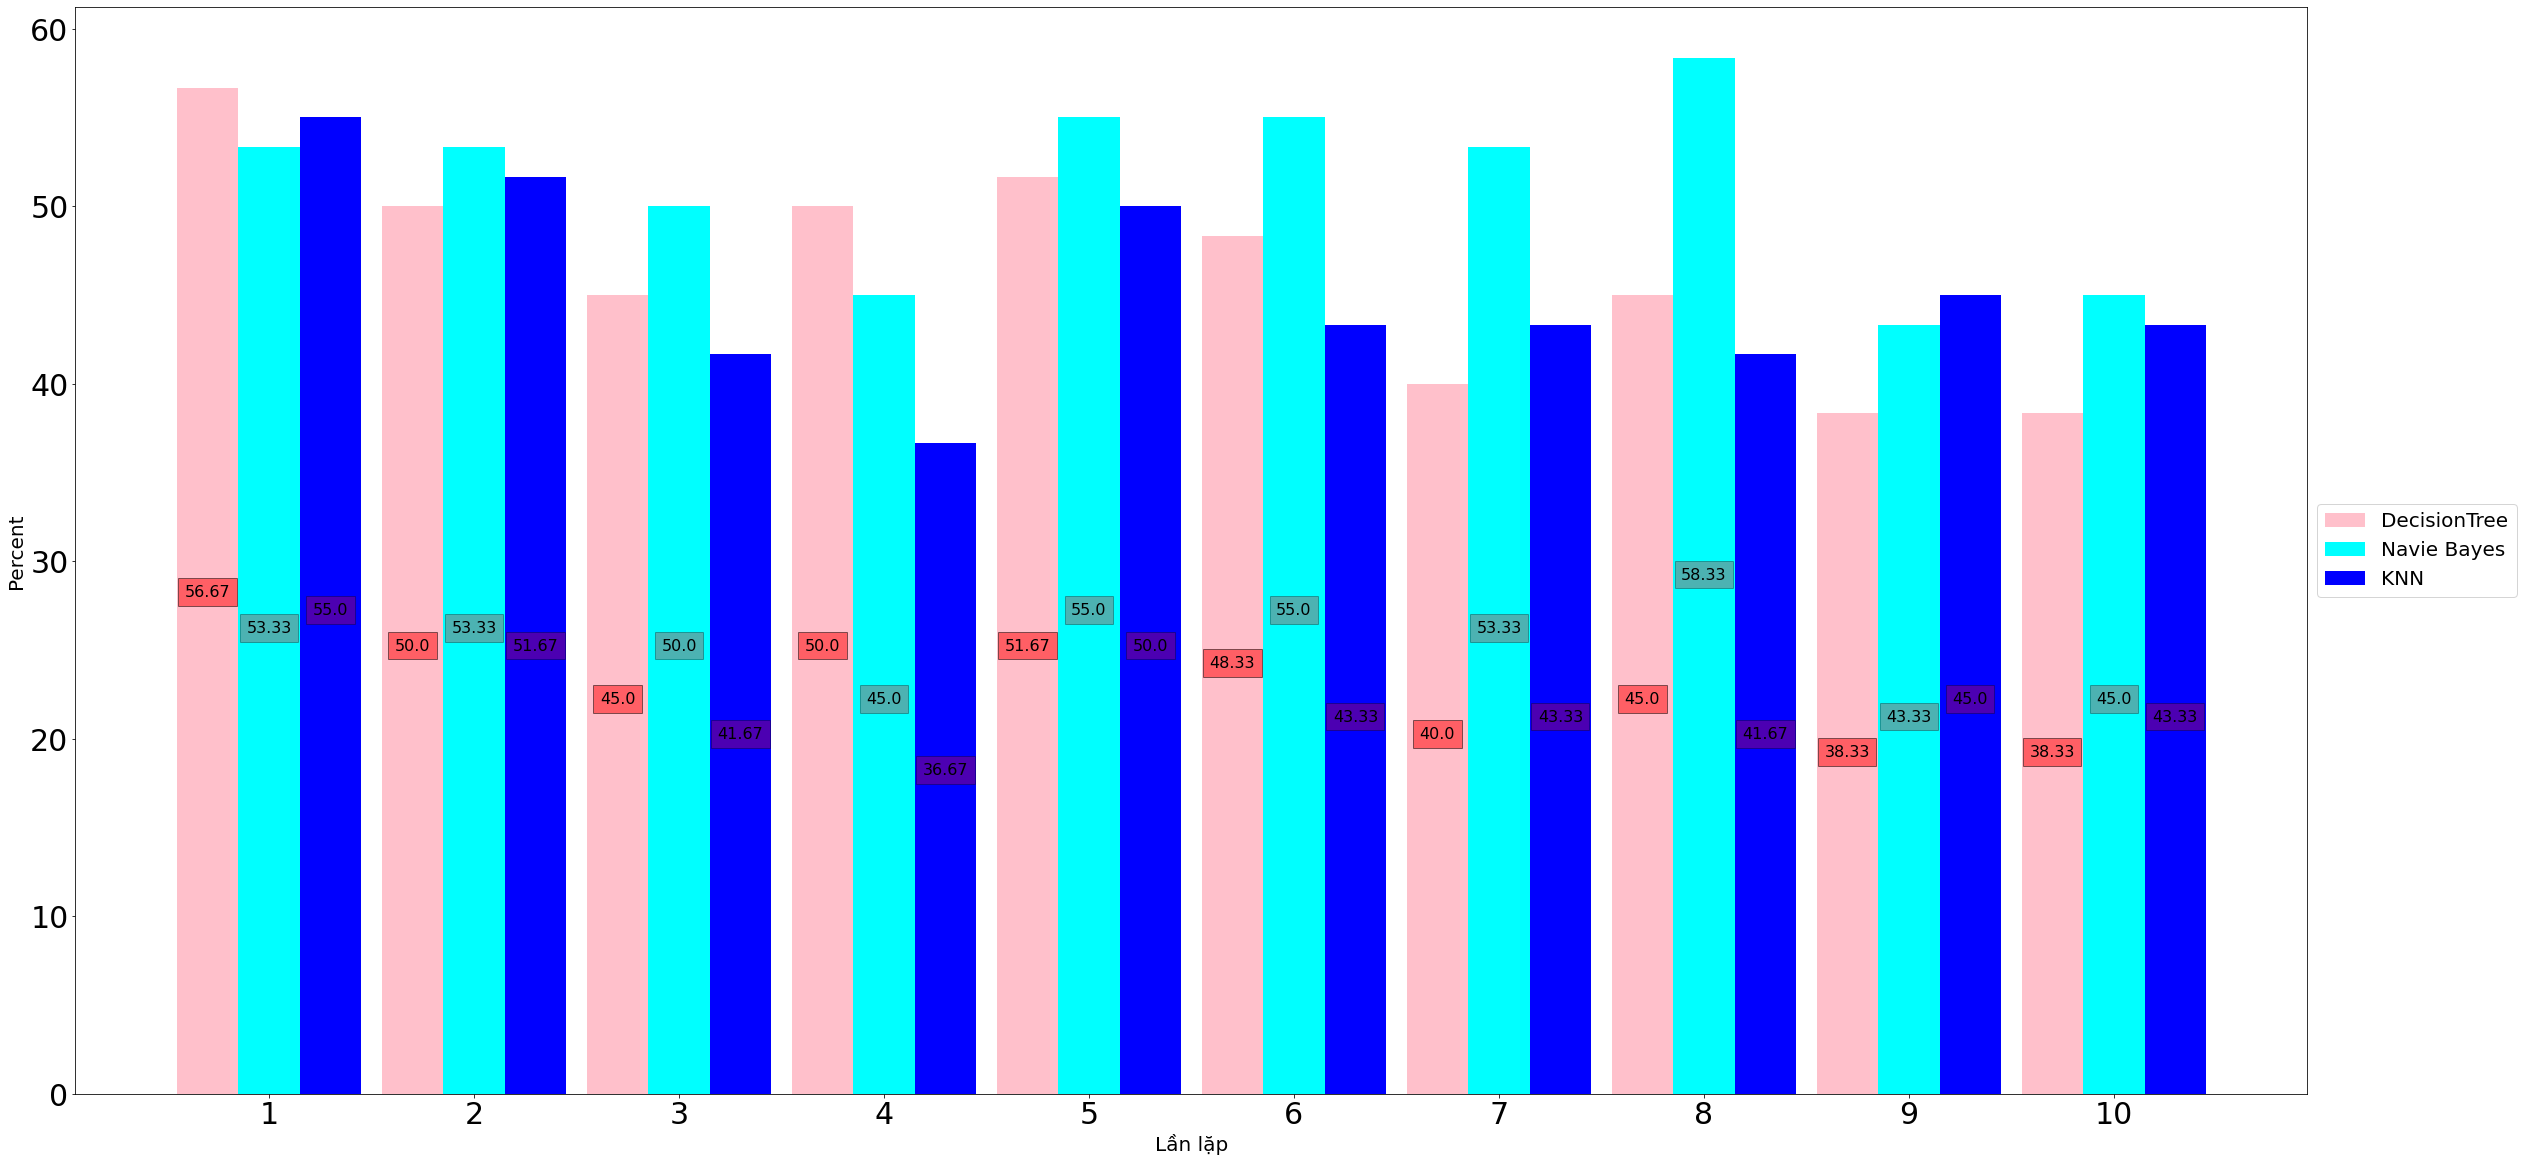

In [73]:
loop = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
decisiontree = [A[0], A[1], A[2], A[3], A[4], A[5], A[6], A[7], A[8], A[9]]
nb = [B[0], B[1], B[2], B[3], B[4], B[5], B[6], B[7], B[8], B[9]]
knn = [C[0], C[1], C[2], C[3], C[4], C[5], C[6], C[7], C[8], C[9]]

plt.figure(figsize=(40,20))
index = np.arange(10)
width = 0.3
plt.bar(index, decisiontree, width, color = 'pink', label = 'DecisionTree')
plt.bar(index+width, nb, width, color = 'cyan', label = 'Navie Bayes')
plt.bar(index+2*width, knn, width, color = 'blue', label = 'KNN')

def addlabels(x,y):
    for i in range(len(loop)):
        plt.text(i, y[i]//2, y[i], ha = 'center', Bbox = dict(facecolor = 'red', alpha =.5), fontsize=16)

def addlabels2(x,y):
    for i in range(len(loop)):
        plt.text(i+width, y[i]//2, y[i], ha = 'center', Bbox = dict(facecolor = 'red', alpha =.3), fontsize=16)

def addlabels3(x,y):
    for i in range(len(loop)):
        plt.text(i+2*width, y[i]//2, y[i], ha = 'center', Bbox = dict(facecolor = 'red', alpha =.3), fontsize=16)
        
addlabels(index, decisiontree)

addlabels2(index+width, nb)

addlabels3(index+2*width, knn)



plt.ylabel('Percent', fontsize=20)
plt.xlabel('Lần lặp', fontsize=20)
plt.yticks(fontsize = 30)
plt.xticks(index + width, loop, fontsize = 30)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 20})


plt.show()

# Cây quyết định của mô hình DecisionTreeClassifier(model1) theo độ lợi thông tin với các tham số min_samples_leaf=7 và max_depth=7

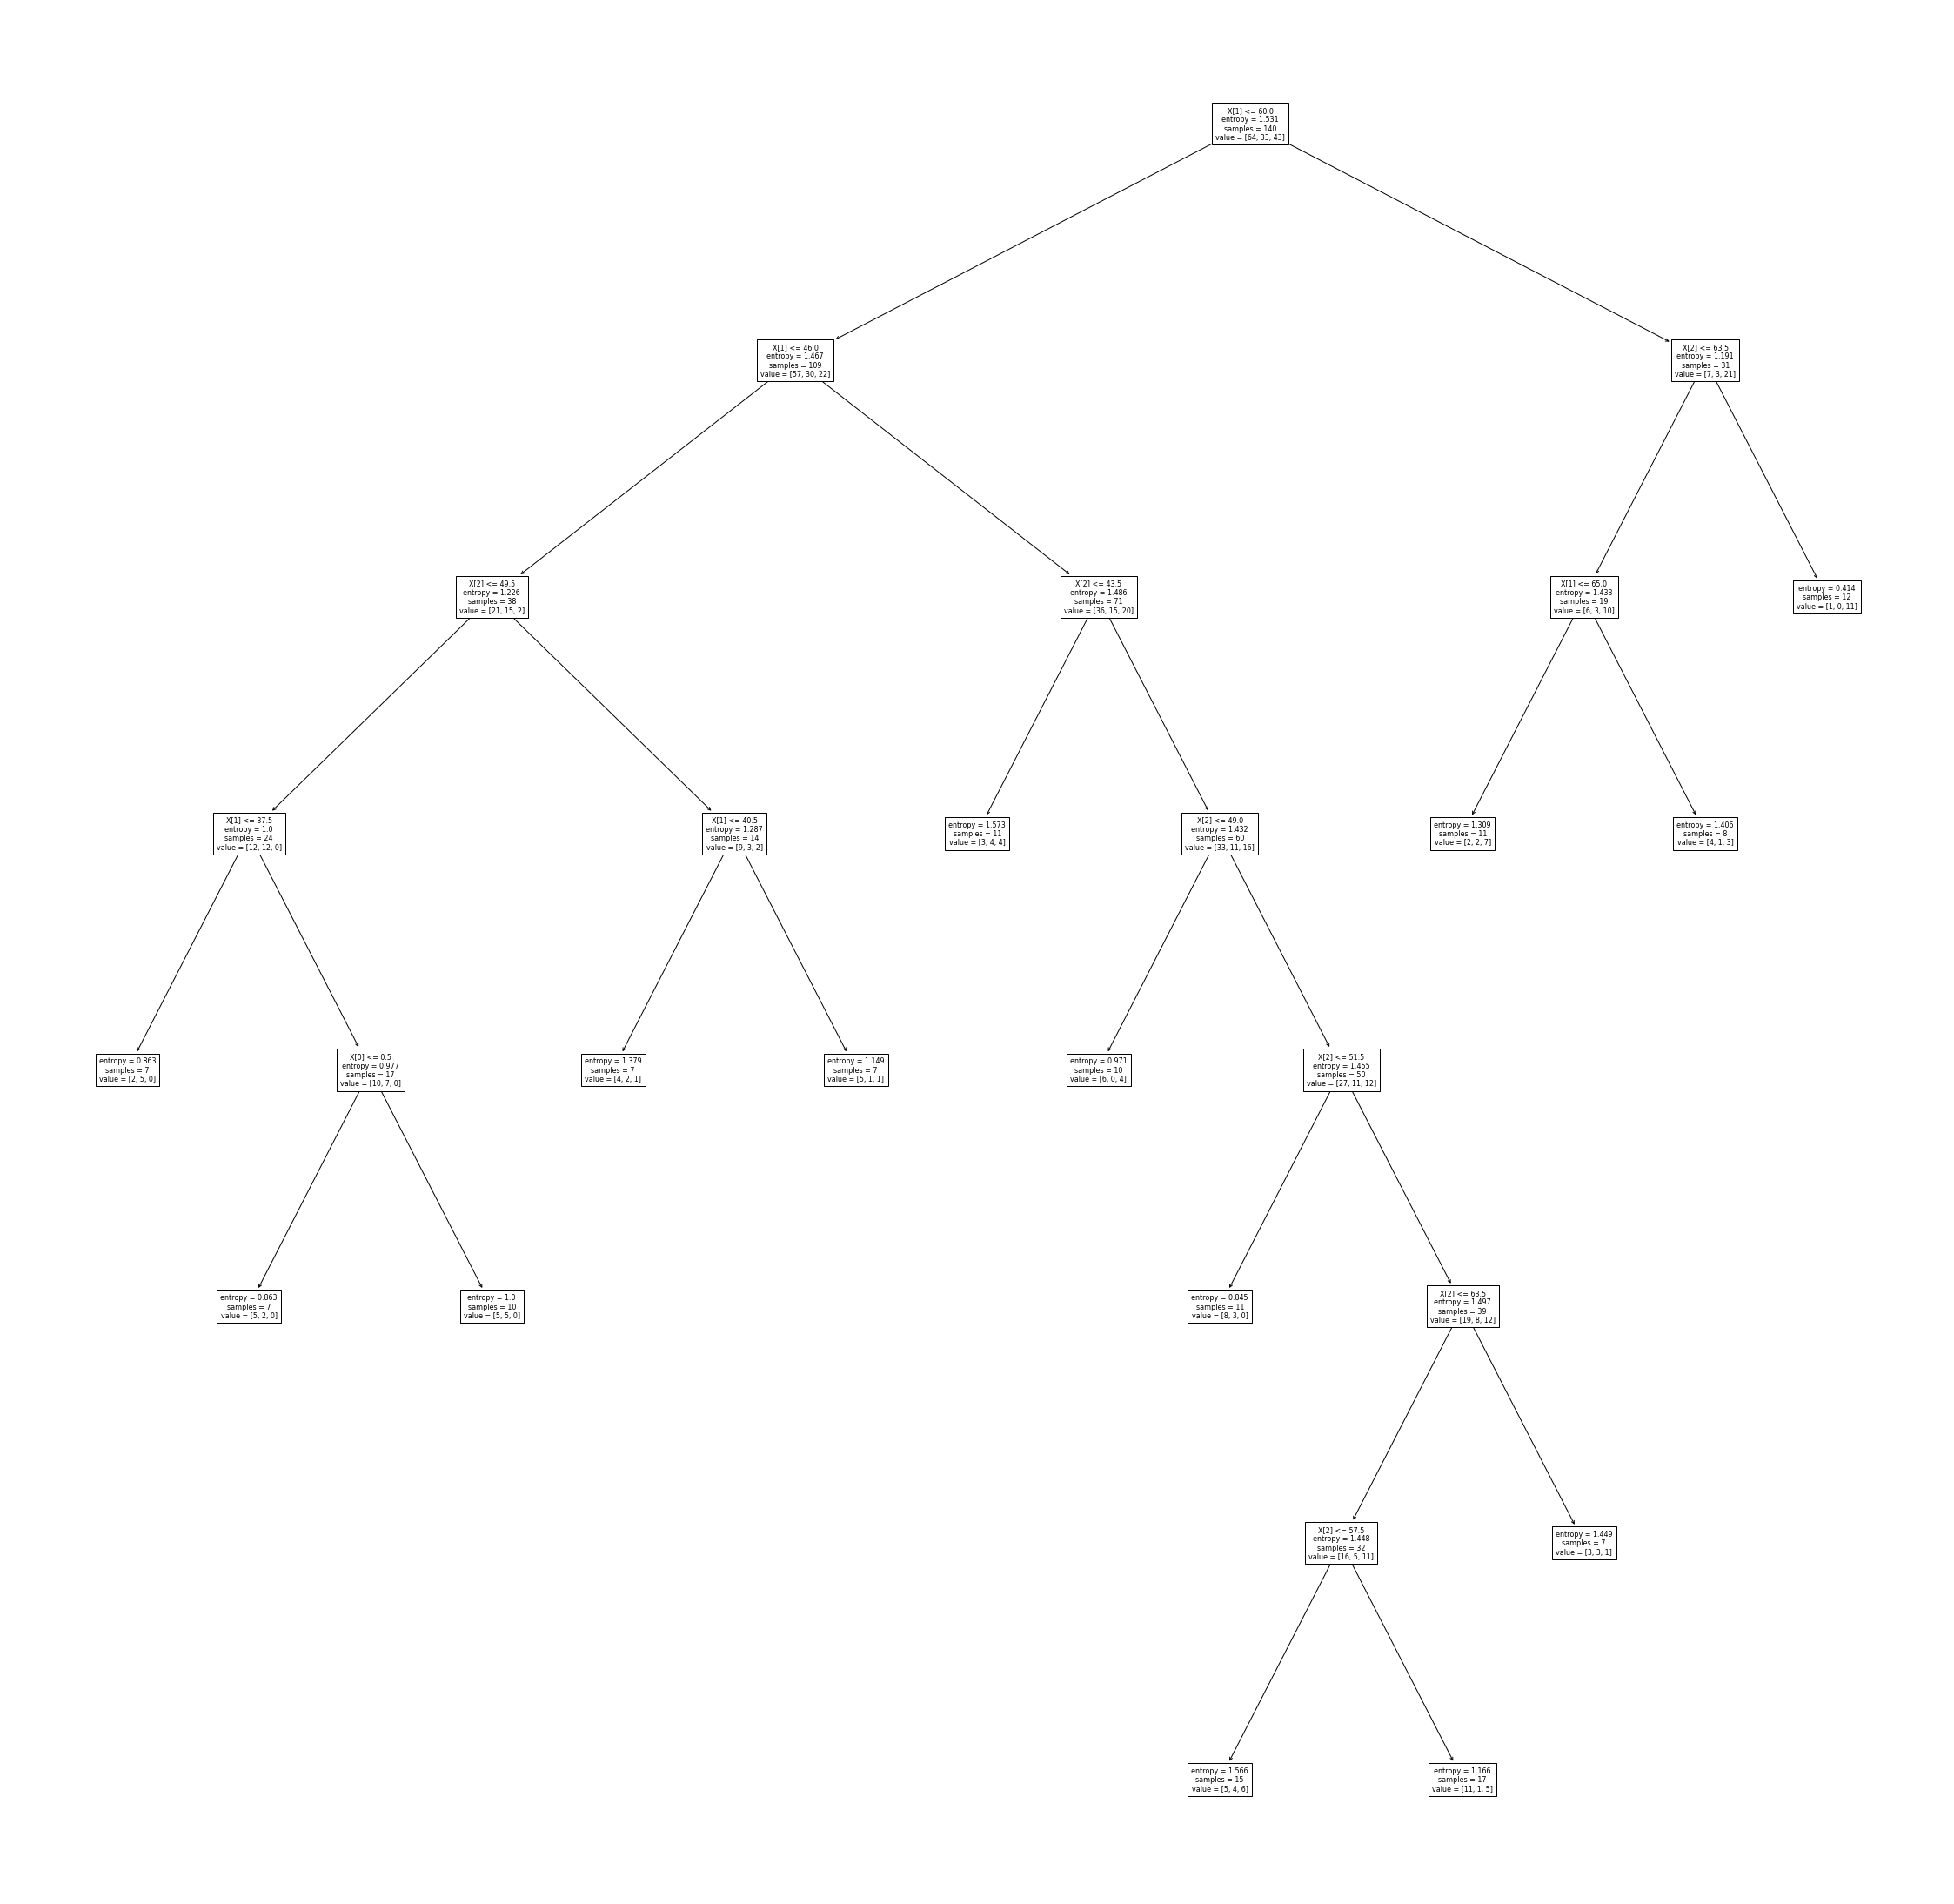

In [19]:
# Hiển thị cây
plt.figure(figsize=(40,40))
tree.plot_tree(model1,fontsize=8)

plt.show()